## Author Nevena Mitic

This project focuses on different classifications algorithms, using both, traditional machine learning and deep learning.
The idea is to train different models for the same data set, and see which performing the best. 

For this project, we will use the SECOM manufacturing Data Set from the UCI Machine Learning Repository. The manufacturing  process is normally under consistent surveillance via the monitoring of signals/variables collected from sensors and or process measurement points. If we consider each type of signal as a feature, then feature selection may be applied to identify the most relevant signals. 

The dataset presented in this case represents a selection of such features where each example represents a single production entity with associated measured features and the labels represent a simple pass/fail yield for in house line testing, figure 2, and associated date time stamp. Where –1 corresponds to a pass and 1 corresponds to a failThe set is for semiconductor manufacturing process.

The dataset consists of two files:

- a dataset file SECOM containing 1567 examples, each with 591 features, presented in a 1567 x 591 matrix
- a labels file listing the classifications and date time stamp for each example

Reference:
Dua, D. and Karra Taniskidou, E. (2017). UCI Machine Learning Repository http://archive.ics.uci.edu/ml. Irvine, CA: University of California, School of Information and Computer Science.


### Instructions
Assume the 591 attributes represent different sensors readings across the manufacturing process. 

Using the SECOM dataset https://archive.ics.uci.edu/ml/datasets/SECOM , we will create a new notebook, and perform each of the following tasks and answer the related questions:

- Read and merge data
- Clean and prepare data 
- Visually explore data
- Handle class imbalance problem
- Apply feature selection techniques to reduce dimensionality of data

### Read and Merge Data

In [1]:
import pandas as pd
import numpy as np
file1 = "https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data"
file2 = "https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data"
sensor_data = pd.read_csv(file1, sep='\s+', header = None)

#print(sensor_data.head(10))
#sensor_data.dtypes
#sensor_data.shape
labels_data = pd.read_csv(file2, sep='\s+', header = None)
labels_data.head(10)
labels_data.shape

# rename columns
labels_data.rename(
  columns={
    0 : 'label',
    1 : 'date'
  },
  inplace=True
)

data = pd.concat([sensor_data, labels_data], axis=1)
print(data.shape)
data.head(20)
#pd.unique(data['label'])
#data.dtypes

(1567, 592)


,0,1,2,3,4,5,6,7,8,9,...,582,583,584,585,586,587,588,589,label,date
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1,19/07/2008 11:55:00
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1,19/07/2008 12:32:00
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,19/07/2008 13:17:00
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1,19/07/2008 14:43:00
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1,19/07/2008 15:22:00
5,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5287,0.0167,...,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077,-1,19/07/2008 17:53:00
6,3030.27,2430.12,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.5816,-0.0270,...,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077,-1,19/07/2008 19:44:00
7,3058.88,2690.15,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5153,0.0157,...,0.4984,0.0106,0.0034,2.1261,0.0204,0.0194,0.0063,95.0310,-1,19/07/2008 19:45:00
8,2967.68,2600.47,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5358,0.0111,...,0.4993,0.0172,0.0046,3.4456,0.0111,0.0124,0.0045,111.6525,-1,19/07/2008 20:24:00
9,3016.11,2428.37,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5381,0.0159,...,0.4967,0.0152,0.0038,3.0687,0.0212,0.0191,0.0073,90.2294,-1,19/07/2008 21:35:00


In [2]:
# For practice, Convert date to Datetime Object
import datetime as dt
from collections import OrderedDict

data["date"] = pd.to_datetime(data["date"], format='%d/%m/%Y %H:%M:%S')

data.head()

,0,1,2,3,4,5,6,7,8,9,...,582,583,584,585,586,587,588,589,label,date
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1,2008-07-19 11:55:00
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1,2008-07-19 12:32:00
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,2008-07-19 13:17:00
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1,2008-07-19 14:43:00
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1,2008-07-19 15:22:00


### Clean and prepare data

In [3]:
## Function for median imputation of the missing numeric values (in dataset represented by the 'NaN')
def replace_NaN(df, columnName):
    df.loc[:, columnName] = pd.to_numeric(df.loc[:, columnName], errors='coerce')
    HasNan = np.isnan(df.loc[:,columnName])
    df.loc[HasNan, columnName] = np.nanmedian(df.loc[:,columnName]) 
    
## Replace NaN values for each column
for column in data:
    replace_NaN(data, column)    
    
## Normalize data
from sklearn import preprocessing 
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()
#Create an object to transform the data to fit minmax processor
feature_data = data.iloc[:,0:590]
data_scaled = min_max_scaler.fit_transform(feature_data)
#Run the normalizer on the dataframe
data_normalized = pd.DataFrame(data_scaled)
#data_normalized.head(10)

## Replace NaN values for each column
#for column in data_normalized:
#    replace_NaN(data_normalized, column)
    
    
## Merge cleaned and normilize data to the label   
all_data = pd.concat([data_normalized, labels_data], axis=1)
all_data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,582,583,584,585,586,587,588,589,label,date
0,0.469231,0.589292,0.499096,0.379841,0.000609,0.0,0.328562,0.965785,0.665019,0.542479,...,0.709375,0.012325,0.017510,0.011880,0.312448,0.151239,0.130435,0.097518,-1,19/07/2008 11:55:00
1,0.575003,0.445535,0.666763,0.393982,0.000133,0.0,0.428942,0.969673,0.656639,0.412315,...,0.753125,0.034637,0.036965,0.033099,0.221387,0.220339,0.181159,0.282386,-1,19/07/2008 12:32:00
2,0.308868,0.583388,0.493903,0.457065,0.000744,0.0,0.283455,0.965008,0.542759,0.448168,...,0.562500,0.020612,0.021401,0.020152,0.629073,0.589309,0.500000,0.112383,1,19/07/2008 13:17:00
3,0.400385,0.466998,0.543479,0.244894,0.000574,0.0,0.469123,0.946345,0.638590,0.319564,...,0.662500,0.009137,0.007782,0.008734,0.309942,0.152542,0.123188,0.100153,-1,19/07/2008 14:43:00
4,0.471367,0.500400,0.678327,0.357067,0.000765,0.0,0.387631,0.960342,0.670606,0.392050,...,0.068750,1.000000,1.000000,1.000000,0.309942,0.152542,0.123188,0.100153,-1,19/07/2008 15:22:00
5,0.331115,0.398566,0.678327,0.357067,0.000765,0.0,0.387631,0.960342,0.725612,0.546376,...,0.534375,0.027412,0.026265,0.026809,0.426901,0.155150,0.152174,0.059687,-1,19/07/2008 17:53:00
6,0.468154,0.394611,0.666763,0.393982,0.000133,0.0,0.428942,0.969673,0.839278,0.205768,...,0.725000,0.017637,0.024319,0.016859,0.426901,0.155150,0.152174,0.059687,-1,19/07/2008 19:44:00
7,0.514818,0.772732,0.739336,0.270379,0.000096,0.0,0.511637,0.921462,0.696820,0.538581,...,0.643750,0.009775,0.016537,0.009465,0.311612,0.211213,0.192029,0.128890,-1,19/07/2008 19:45:00
8,0.366068,0.642324,0.739336,0.270379,0.000096,0.0,0.511637,0.921462,0.740868,0.502728,...,0.671875,0.023799,0.028210,0.022915,0.233918,0.119948,0.126812,0.151433,-1,19/07/2008 20:24:00
9,0.445059,0.392066,0.739336,0.270379,0.000096,0.0,0.511637,0.921462,0.745810,0.540140,...,0.590625,0.019550,0.020428,0.019073,0.318296,0.207301,0.228261,0.122377,-1,19/07/2008 21:35:00


In [4]:
all_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,label
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.0,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,0.442338,0.490215,0.549443,0.375604,0.003133,0.0,0.402906,0.947316,0.584143,0.409652,...,0.111763,0.696757,0.019798,0.020879,0.019062,0.320450,0.173062,0.155177,0.135158,-0.867262
std,0.119849,0.116663,0.115397,0.118394,0.050369,0.0,0.131775,0.069484,0.158679,0.117744,...,0.076425,0.106351,0.036495,0.036180,0.036460,0.103210,0.114796,0.103848,0.127308,0.498010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.364413,0.427715,0.473043,0.291756,0.000302,0.0,0.335448,0.941680,0.473249,0.332034,...,0.098045,0.628125,0.011900,0.013619,0.011304,0.253551,0.096480,0.083333,0.060177,-1.000000
50%,0.437523,0.495361,0.551465,0.345949,0.000570,0.0,0.411304,0.951788,0.581435,0.406080,...,0.098045,0.700000,0.016575,0.018482,0.015903,0.312448,0.151239,0.130435,0.097518,-1.000000
75%,0.511001,0.552567,0.618191,0.428036,0.000752,0.0,0.475348,0.962675,0.700150,0.481684,...,0.098045,0.767187,0.022312,0.023346,0.021379,0.371763,0.222947,0.195652,0.155634,-1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From the above summary of data we can see that there are some columns with constant values (e.g. column no.5 all values are zero). This columns are not useful to model so we will remove them.

In [5]:
## Removing constant columns
all_data = all_data.loc[:,all_data.apply(pd.Series.nunique) != 1]
print(all_data.shape)
all_data.head(10)

(1567, 476)


,0,1,2,3,4,6,7,8,9,10,...,582,583,584,585,586,587,588,589,label,date
0,0.469231,0.589292,0.499096,0.379841,0.000609,0.328562,0.965785,0.665019,0.542479,0.358362,...,0.709375,0.012325,0.017510,0.011880,0.312448,0.151239,0.130435,0.097518,-1,19/07/2008 11:55:00
1,0.575003,0.445535,0.666763,0.393982,0.000133,0.428942,0.969673,0.656639,0.412315,0.228669,...,0.753125,0.034637,0.036965,0.033099,0.221387,0.220339,0.181159,0.282386,-1,19/07/2008 12:32:00
2,0.308868,0.583388,0.493903,0.457065,0.000744,0.283455,0.965008,0.542759,0.448168,0.411832,...,0.562500,0.020612,0.021401,0.020152,0.629073,0.589309,0.500000,0.112383,1,19/07/2008 13:17:00
3,0.400385,0.466998,0.543479,0.244894,0.000574,0.469123,0.946345,0.638590,0.319564,0.359499,...,0.662500,0.009137,0.007782,0.008734,0.309942,0.152542,0.123188,0.100153,-1,19/07/2008 14:43:00
4,0.471367,0.500400,0.678327,0.357067,0.000765,0.387631,0.960342,0.670606,0.392050,0.315131,...,0.068750,1.000000,1.000000,1.000000,0.309942,0.152542,0.123188,0.100153,-1,19/07/2008 15:22:00
5,0.331115,0.398566,0.678327,0.357067,0.000765,0.387631,0.960342,0.725612,0.546376,0.459613,...,0.534375,0.027412,0.026265,0.026809,0.426901,0.155150,0.152174,0.059687,-1,19/07/2008 17:53:00
6,0.468154,0.394611,0.666763,0.393982,0.000133,0.428942,0.969673,0.839278,0.205768,0.516496,...,0.725000,0.017637,0.024319,0.016859,0.426901,0.155150,0.152174,0.059687,-1,19/07/2008 19:44:00
7,0.514818,0.772732,0.739336,0.270379,0.000096,0.511637,0.921462,0.696820,0.538581,0.405006,...,0.643750,0.009775,0.016537,0.009465,0.311612,0.211213,0.192029,0.128890,-1,19/07/2008 19:45:00
8,0.366068,0.642324,0.739336,0.270379,0.000096,0.511637,0.921462,0.740868,0.502728,0.321957,...,0.671875,0.023799,0.028210,0.022915,0.233918,0.119948,0.126812,0.151433,-1,19/07/2008 20:24:00
9,0.445059,0.392066,0.739336,0.270379,0.000096,0.511637,0.921462,0.745810,0.540140,0.452787,...,0.590625,0.019550,0.020428,0.019073,0.318296,0.207301,0.228261,0.122377,-1,19/07/2008 21:35:00


### Data Visualization

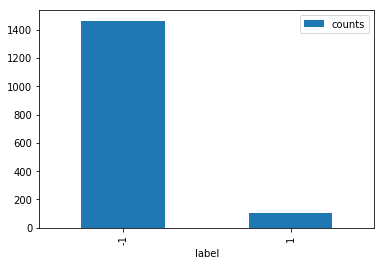

In [6]:
%matplotlib inline
#all_data.loc[:,'label'].plot.hist(bins = 30)
all_data['counts'] = 1
all_data.loc[:, ['label', 'counts']].groupby(['label']).agg('count').plot.bar()

From the plot above we can see that we have imbalance class problem and we will handle this issue in the code below.

###  Class imbalance problem

In [7]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

# First we will separate our features from target
X = all_data.values[:,0:474]
y = all_data.values[:,474]
y=y.astype('int')
print(X.shape)
print(y.dtype)

print('Original dataset shape Counter{}'.format(Counter(y)))
#print(X)
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X, y)
print('Resampled dataset shape {}'.format(Counter(y_res)))

print(X_res.shape)

(1567, 474)
int32
Original dataset shape CounterCounter({-1: 1463, 1: 104})
Resampled dataset shape Counter({-1: 1463, 1: 1463})
(2926, 474)


### Feature selection

In [8]:
## We will try Ridge classifier
from sklearn.linear_model import RidgeClassifier
from sklearn import model_selection
from sklearn import metrics
# Fit and evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_res, y_res, test_size=0.3, random_state=0)

y_train = y_train.tolist()
ridge = RidgeClassifier(alpha=0.005)
model = ridge.fit(X_train, y_train)

In [9]:
# predict class labels for the test set
predicted = model.predict(X_test)
y_test= y_test.tolist()
predicted = predicted.tolist()

# generate evaluation metrics
print("Accuracy on the test set:")
print (metrics.accuracy_score(y_test, predicted))


Accuracy on the test set:
0.8940774487471527


In [10]:
# evaluate the model using 10-fold cross-validation
from sklearn.model_selection import cross_val_score
y_res = y_res.tolist()
scores = cross_val_score(RidgeClassifier(alpha=0.005), X_res, y_res, scoring='accuracy', cv=10)
print (scores)
print (scores.mean())

[0.63139932 0.80204778 0.89419795 0.89419795 0.92491468 0.87372014
 0.91780822 0.84246575 0.87328767 0.93835616]
0.8592395623918836


Looks good. It's still performing at 85% accuracy

### Summary

 - In Read data section, we've loaded data from two files and merged all data into one dataframe. 
 - In Clean and Prepare data section, we applied pre-processing objects to the dataset simply to normalize the data and remove the constant features. Also NaN values were replaced with median value. (Droping rows with NaN values was not an option here because we would lose all data)
 - In Data Visualization section, we noted that we had imbalance class problem, so we used SMOTE technique to deal with that.
 - Since we had a classification task, we used Ridge classifier to achieve some initial results. Also 10 fold cross validation was used to evaluate model.